# Datastrukturer: Lister
* I forrige time regnet vi på populasjonsvekst for Norge og Sverige
* Hva om vi i populasjonsveksteksempelet ikke bare så på 2 land, men kanskje alle i Europa
* Alle parametre måtte ha en egen variabel for hvert land
* Det fungerer dårlig -- i praksis må vi ha like mange variabler som datapunkt
* Det kan dreie seg om millioner av variabler å lage navn til å holde styr på
* **NEI TAKK**

## Lister
* Vi trenger en annen måte å organisere og *strukturere* datapunktene våre på
* Python har flere ulike typer **datastrukturer** som kan hjelpe oss med det
* Den første vi skal se på er *lister*

* Vi lager lister med ting ved å «liste de opp» inne i klammeparanteser (opt  8 og 9 på mac ?)
* Listene kan inneholde alle hva som helst, til og med funksjoner, og vi kan blande datatyper

In [2]:
#De kan inneholde alt mulig, til og med funksjoner
a = ["hei", 22, 4e6, print]
a

['hei',
 22,
 4000000.0,
 <function print(*args, sep=' ', end='\n', file=None, flush=False)>]

* For å hente ut et element i listen oppgir vi *indeksen* til elementet i klammeparanteser bak listen

In [5]:
print(a)
#Element3
a[2]


['hei', 22, 4000000.0, <built-in function print>]


4000000.0

In [6]:
#Element 1
a[0]

'hei'

* Merk at listene er «0-indeksert», vi teller altså fra og med 0 og oppover
* Noen datastrukturer er det ulovlig å endre innholdet av, men med lister kan vi det

In [21]:
#Vi endrer element nr 3, som har indeks 2
a[2] = 4.5
#Vi endrer første element
a[0] = 2
#Dersom vi bruker negative indekser, "begynner" vi på slutten av listen
a[-1] = 45
print(a)

[2, 4.5, 4.5, 45]


* Vi kan bruke dir() for å se nyttige innebygde funksjoner av listen
* Disse kan kalles med '.' feks `min_liste.sort()` for å sortere listen i stigende rekkefølge


In [17]:
print(a)
#print(dir(a))
#Sorter liste a
a.sort()
print("Sortert a", a)
#Fjern siste element og lagre i variabel

[2, 4.5, 22, 45]
Sortert a [2, 4.5, 22, 45]


In [23]:
print(a)
#Legg til et element på slutten:
a.append(-1)
print(a)

[2, 4.5, 4.5, 45]
[2, 4.5, 4.5, 45, -1]


In [28]:
a = [1,2,3,4,5,6,7,8]
# "Pop" første element
siste = a.pop()
print("Siste", siste, "\nRest", a)
#Fjerne første?
forste = a.pop(0)
print("Første", forste, "\nRest", a)

Siste 8 
Rest [1, 2, 3, 4, 5, 6, 7]
Første 1 
Rest [2, 3, 4, 5, 6, 7]


* Andre viktige funksjoner er `len(«liste»)` og `max(«liste»)`

In [29]:
print("Lengden på liste a er:", len(a))
print("Største element er:", max(a))

Lengden på liste a er: 6
Største element er: 7


## Eks: Populasjonsvekst - Skandinavia
* Samme eksempel som tidligere, men vi ser på hele skandinavia

In [ ]:
import math
land = ["Norge", "Sverige", "Danmark"]
K = [20e6, 25e6, 15e6] #Makspopulasjon
r = [0.01, 0.02, 0.03] #relativ vekstrate
P0 = [4e6, 8e6, 6e6] # Startpopulasjon
t = 20 #Hvor mange år vekst


def logistisk_vekst(P0,K,r,t):
    A = (K-P0)/P0
    P = K/(1+A*math.exp(-r*t))
    return P
  
def lag_pop_funk(P0,K,r):
    def slutt_populasjon(t):
        P = logistisk_vekst(P0,K,r,t)
        return P
    return slutt_populasjon #Vi returnerer funksjonen vi laget inne i funksjonen!

def format_pop(P):
    return int(round(P,-3))

pop_funksjoner = [] #Liste med funksjoner som regner ut populasjon ved tiden t for land 0,1,2
pop_funksjoner.append( lag_pop_funk(P0[0], K[0], r[0]))
pop_funksjoner.append(lag_pop_funk(P0[1], K[1], r[1]))
pop_funksjoner.append(lag_pop_funk(P0[2], K[2], r[2]))
#Vi kunne også lagret disse funksjonene i en liste.. :)

#print(type(pop_norge))
P_slutt = []
P_slutt.append(pop_funksjoner[0](t))
P_slutt.append(pop_funksjoner[1](t))
P_slutt.append(pop_funksjoner[2](t))

print("Sluttpopulasjonen i", land[0], "er:", format_pop(P_slutt[0]))
print("Sluttpopulasjonen i", land[1], "er:", format_pop(P_slutt[1]))
print("Sluttpopulasjonen i", land[2], "er:", format_pop(P_slutt[2]))


# Fortsatt problemer?
* Vi har samlet dataene vår i lister -- det er bra
* Men vi må fortsatt gå igjennom disse listene for hånd -- ikke bra
* Vi trenger en måte å gå gjennom lister og andre datastrukturer *automatisk*

# Løkker: `for`-løkken
* I programmering trenger vi ofte å gjenta ca. samme operasjon mange ganger
* Vi kan da lage det som kalles en løkke, eller *loop* på engelsk
* Løkken består av kode som vi kjører om igjen mange ganger
* Hver runde gjennom løkken kalles en *iterasjon*
* Dersom må har en løkke som gjør noe for alle elementene i en liste `a` sier man at man *itererer* over listen



* Vi har to metoder for å gjenta ting mange ganger i python:
  - `for`-løkken (for-loop)
  - `while`-løkken
* I en `for` løkke gjør vi noe «for» alle elementene i en samling elementer man kan *iterere* over
* Syntaksen er som følger:

```python
for element in samling_elementer:
    #Gjør noe med elementene
    print("Elementet er ", element)
#Løkke ferdig
```

* «element» er her et variabelnavn for enkeltelementene i samlingen.
* Vi kan gi det hvilket som helst gyldig navn som `i, j, x, y, datapunkt, person ...` osv
* Dersom vi gir det navnet `_` (nedestrek) går vi igjennom datasamlingen uten å bry oss om enkeltelementet

In [31]:
print(a)
#Print ut innholdet i listen a ett element om gangen
for tall in a:
    print(tall)
print("Ferdig")

[2, 3, 4, 5, 6, 7]
2
3
4
5
6
7
Ferdig


* Når man skal bygge og fylle en liste med data er det vanlig å starte med en tom liste feks `b=[]`
* Deretter iterere over noen annen data en bruker til å fylle listen med `b.append(«nytt datapunkt»)`

In [33]:
a = [1,2,3,4,5]
# Lag en liste b hvor elementene er dobbelt av de i a:
b = []
for tall in a:
    dobbelt = tall*2
    b.append(dobbelt)
print(b) 

[2, 4, 6, 8, 10]


In [34]:
%%html
<iframe width="800" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=%23%20Lag%20en%20liste%20b%20hvor%20elementene%20er%20dobbelt%20av%20de%20i%20a%3A%0Aa%20%3D%20%5B1,2,3,4,5%5D%0Ab%20%3D%20%5B%5D%0Afor%20tall%20in%20a%3A%0A%20%20%20%20dobbelt%20%3D%20tall*2%0A%20%20%20%20b.append%28dobbelt%29%0Aprint%28b%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=19&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

* Ofte må man ha kontroll på både elementene i listen, og indeksen til listen
* Da er det vanlig å ikke iterere over selve elementene, men over *indeksområdet* (index range på engelsk)
* Til det bruker man en meget nyttig funksjon `range(..)`
* *Merk:* om man vil liste opp indeksområdet kan man bruke funksjonen `list(«noe itererbart»)` som tar noe man kan iterere over (gå igjennom elementvis) og lager en liste av elementene

In [38]:
#range(«stop») gir en "range" fra 0 til (men ikke med) «stop»
print(list(range(10)))
#range(«start», «stop») gir en "range" fra «start» til (men ikke med) «stop»
print(list(range(3,10)))
#range(«start», «stop», «step»)  gir en "range" fra «start» til (men ikke med) «stop» med steglengde «step»
print(list(range(3,10,2)))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9]
[3, 5, 7, 9]


In [44]:
a = [5,6,7,8,9]
#Doble elementene i listen a
lengde = len(a)
print("lengde", lengde)
for i in range(lengde):
    a[i] = a[i]*2 # Man kan fint oppdatere variabeldata med gammel variabeldata
print(a)

lengde 5
[10, 12, 14, 16, 18]


## Nyttige litt mer avanserte teknikker
* Vi kan gå gjennom en liste OG indeksen til elementene i listen med `enumerate(«liste»)`
* `enumerate(«liste»)` lager et itererbart objekt som inneholder par av elementene i listen og indeksen til elementet:

In [49]:
print(a)
print(list(enumerate(a)))
for indeks, tall in enumerate(a):
    print("tall", tall, "har indeks", indeks)

[10, 12, 14, 16, 18]
[(0, 10), (1, 12), (2, 14), (3, 16), (4, 18)]
tall 10 har indeks 0
tall 12 har indeks 1
tall 14 har indeks 2
tall 16 har indeks 3
tall 18 har indeks 4


* Vi kan "zippe sammen" flere lister og gå igjennom alle elementene samtidig med `zip(liste1, liste2, ...)`
* `zip(«itererbare objekter»)` lager et itererbart objekt med elementene til feks listene satt sammen i grupper

In [51]:
a = [1,2,3,4,5]
b = ["Norge", "Sverige", "Danmark"]
c = [5,6,7,8,9]
for tall1, land, tall2 in zip(a,b,c):
    print("Tall1 er fra a", tall1)
    print("Landet er fra b", land)
    print("tall2 er fra c", tall2)
    print("Ferdig med iterasjon\n\n")
print("ferdig")

Tall1 er fra a 1
Landet er fra b Norge
tall2 er fra c 5
Ferdig med iterasjon


Tall1 er fra a 2
Landet er fra b Sverige
tall2 er fra c 6
Ferdig med iterasjon


Tall1 er fra a 3
Landet er fra b Danmark
tall2 er fra c 7
Ferdig med iterasjon


ferdig


# Kjapp intro til matplotlib
* Når vi kan importere bibliotek og lage lister (og funksjoner?) kan vi plotte:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-1, 2, 7, 14, 23, 34, 47, 62, 79, 98]


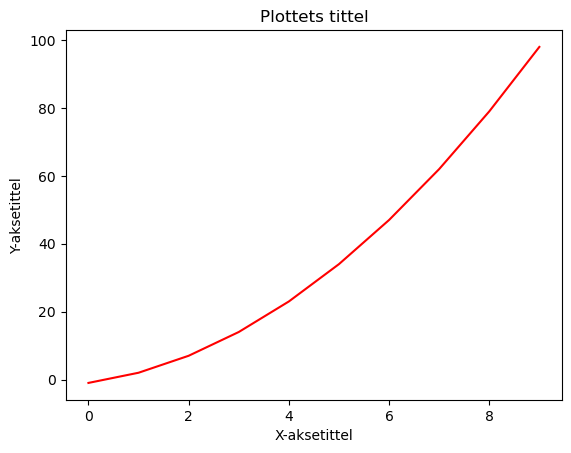

In [62]:
import matplotlib.pyplot as plt #Importer pyplot fra matplotlib og gi det synonymet plt

def andregradsfunksjon(x):
    return 2*x+x**2-1
#Vi vil plott andregradsfunksjon for et knippe x'er

x_liste = list(range(10))
print(x_liste)

y_liste = []
for x in x_liste:
    y = andregradsfunksjon(x)
    y_liste.append(y)
print(y_liste)

plt.plot(x_liste, y_liste, 'o', color="red")
plt.title("Plottets tittel")
plt.xlabel("X-aksetittel")
plt.ylabel("Y-aksetittel")
plt.show()

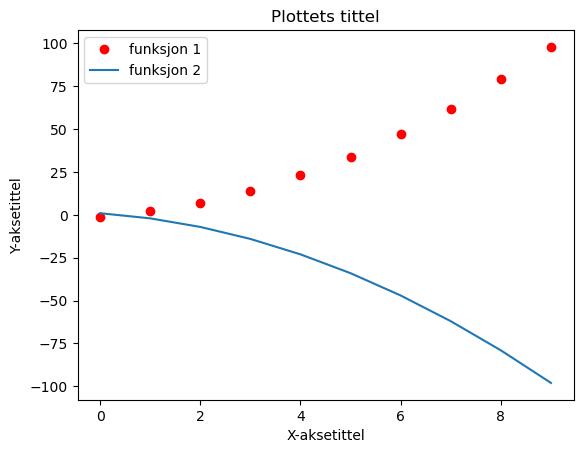

In [65]:
#Plotte flere grafer i samme plott
def f(x):
    return -andregradsfunksjon(x)

y2_liste = []
for x in x_liste:
    y2_liste.append(f(x))


plt.plot(x_liste, y_liste, 'o', color="red", label="funksjon 1")
plt.plot(x_liste, y2_liste, label="funksjon 2")
plt.title("Plottets tittel")
plt.xlabel("X-aksetittel")
plt.ylabel("Y-aksetittel")
plt.legend()
plt.show()


# Litt numpy-tips
* Vi trenger kanskje å plotte en funksjon $f(x)$ for $x \in [0,1]$ og vil ha noen tusen datapunkter
* Da er det kjekt å bruke numpy!
* I numpy har vi ikke lister men *arrays*
* Forskjellen er:
  - Vi kan ikke blande forskjellige datatyper
  - listene kan ikke endre lengde (ingen pop() eller append()
* Fordelen er at vi med disse begresningene (+++) kan regne veldig raskt!

[0.00000000e+00 6.28381369e-04 1.25676274e-03 ... 6.28192854e+00
 6.28255693e+00 6.28318531e+00]
[ 0.00000000e+00  6.28381328e-04  1.25676241e-03 ... -1.25676241e-03
 -6.28381328e-04 -2.44929360e-16]


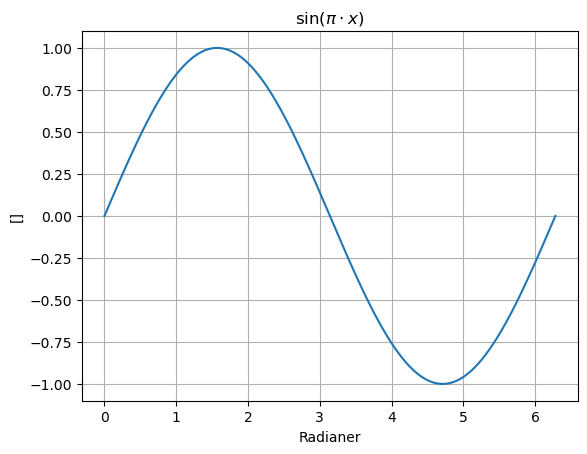

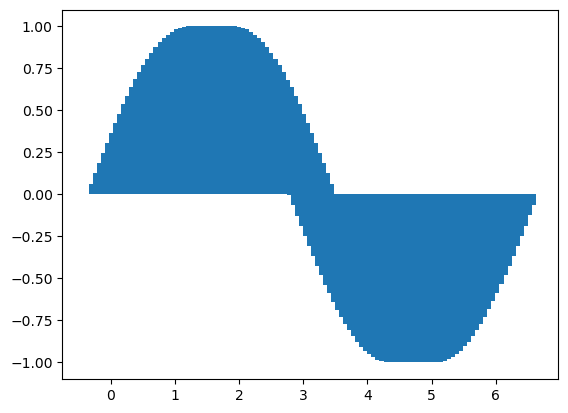

In [81]:
import numpy as np #importer numpy med synonym np

def g(x):
    return np.sin(x)

#Vi vil se på x-verdier mellom 0 og 2*pi 
#Vi vil bruke 10,000 datapunkter
x_start = 0
x_stop = 2*np.pi
n = 10000

#Vi kan lage "x-verdier" i numpy med np.arange eller np.linspace
x = np.arange(x_start, x_stop, 0.1 ) #Verdier mellom start/stop med steglengde 0.1
x = np.linspace(x_start, x_stop, n) #N verdier mellom start/stop
print(x)

#Når vi bruker numpy-arrays python at vi vil ha et array y med elementer g(x) 
y = g(x)
print(y)

plt.plot(x,y)
plt.title(r"$\sin(\pi \cdot x)$") # r"$<latexuttrykk>$"
plt.xlabel("Radianer")
plt.ylabel("[]")
plt.grid()
plt.show()

plt.bar(x[::100], y[::100])
plt.show()

# Populasjonvekst eksempel
Vi undersøker populasjonsvekst i skandinavia og plotter utviklingen de neste 20 årene

In [ ]:
import math
import matplotlib.pyplot as plt
land = ["Norge", "Sverige", "Danmark"]
K = [20e6, 25e6, 15e6] #Makspopulasjon
r = [0.01, 0.02, 0.03] #relativ vekstrate
P0 = [4e6, 8e6, 6e6] # Startpopulasjon
t = 200 #Hvor mange år vekst


def logistisk_vekst(P0,K,r,t):
    A = (K-P0)/P0
    P = K/(1+A*math.exp(-r*t))
    return P

def lag_pop_funk(P0,K,r):
    def slutt_populasjon(t):
        P = logistisk_vekst(P0,K,r,t)
        return P
    return slutt_populasjon #Vi returnerer funksjonen vi laget inne i funksjonen!

def format_pop(P):
    return int(round(P,-3))


    